Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

#### <font color='orange'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что ноутбук хорошо структурирован. Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

### <font color='orange'>Общее впечатление (ревью 2)</font>
* После исправлений проект улучшился и теперь он может быть зачтен.
* Для удобства все новые комментарии обозначены фразой "ревью 2".
* Удачи в дальнейшем обучении и следующих работах!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Полезные-ссылки:" data-toc-modified-id="Полезные-ссылки:-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span><font color="orange">Полезные ссылки:</font></a></span></li></ul></li><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка данных

Импортируем необходимые библиотеки и загрузим данные из CSV-файла:

In [1]:
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
try:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except:
    df = pd.read_csv('taxi.csv', index_col=[0], parse_dates=[0])
    
display(df.info())
display(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Проверим, в хронологическом ли порядке расположены даты и время. 

In [3]:
df.index.is_monotonic

True

Мы загрузили данные и установили столбец 'datetime' в качестве индекса, преобразовав его в формат datetime. Теперь выполним ресемплирование по одному часу.

In [4]:
df = df.resample('1H').sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


Теперь в DataFrame 4416 записей, каждая из которых представляет собой один час между 1 марта 2018 года и 31 августа 2018 года.

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Ресемплинг был сделан верно.
</div>

## Анализ

Построим графики для оценки общей динамики заказов. Для скользящего среднего используем 24-часовое окно, поскольку это дает один полный день для учета возможных ежедневных сезонных паттернов.

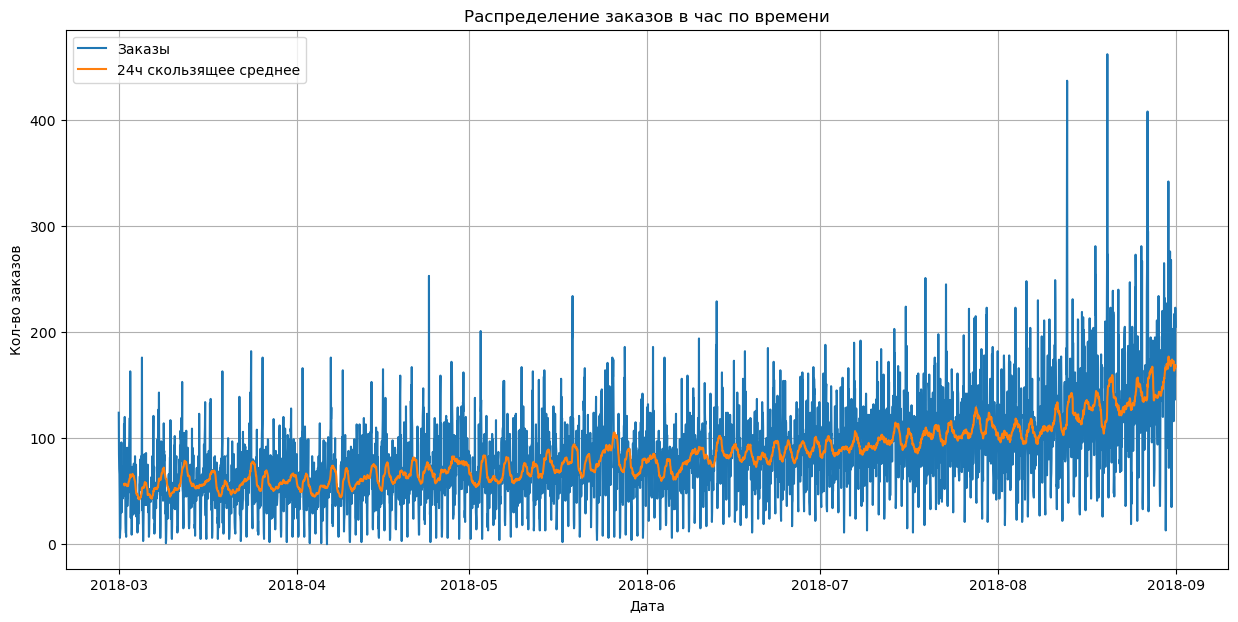

In [5]:
df['rolling_mean'] = df['num_orders'].rolling(24).mean()

plt.figure(figsize=(15, 7))
plt.plot(df.index, df.num_orders, label='Заказы')
plt.plot(df.index, df.rolling_mean, label='24ч скользящее среднее')
plt.title('Распределение заказов в час по времени')
plt.xlabel('Дата')
plt.ylabel('Кол-во заказов')
plt.legend()
plt.grid(True)
plt.show()

На графике явно заметен рост скользящего среднего к концу периода. Этот наблюдаемый тренд может быть обусловлен различными факторами, например, ростом клиентской базы, расширением географии предоставления услуг или сезонными факторами.

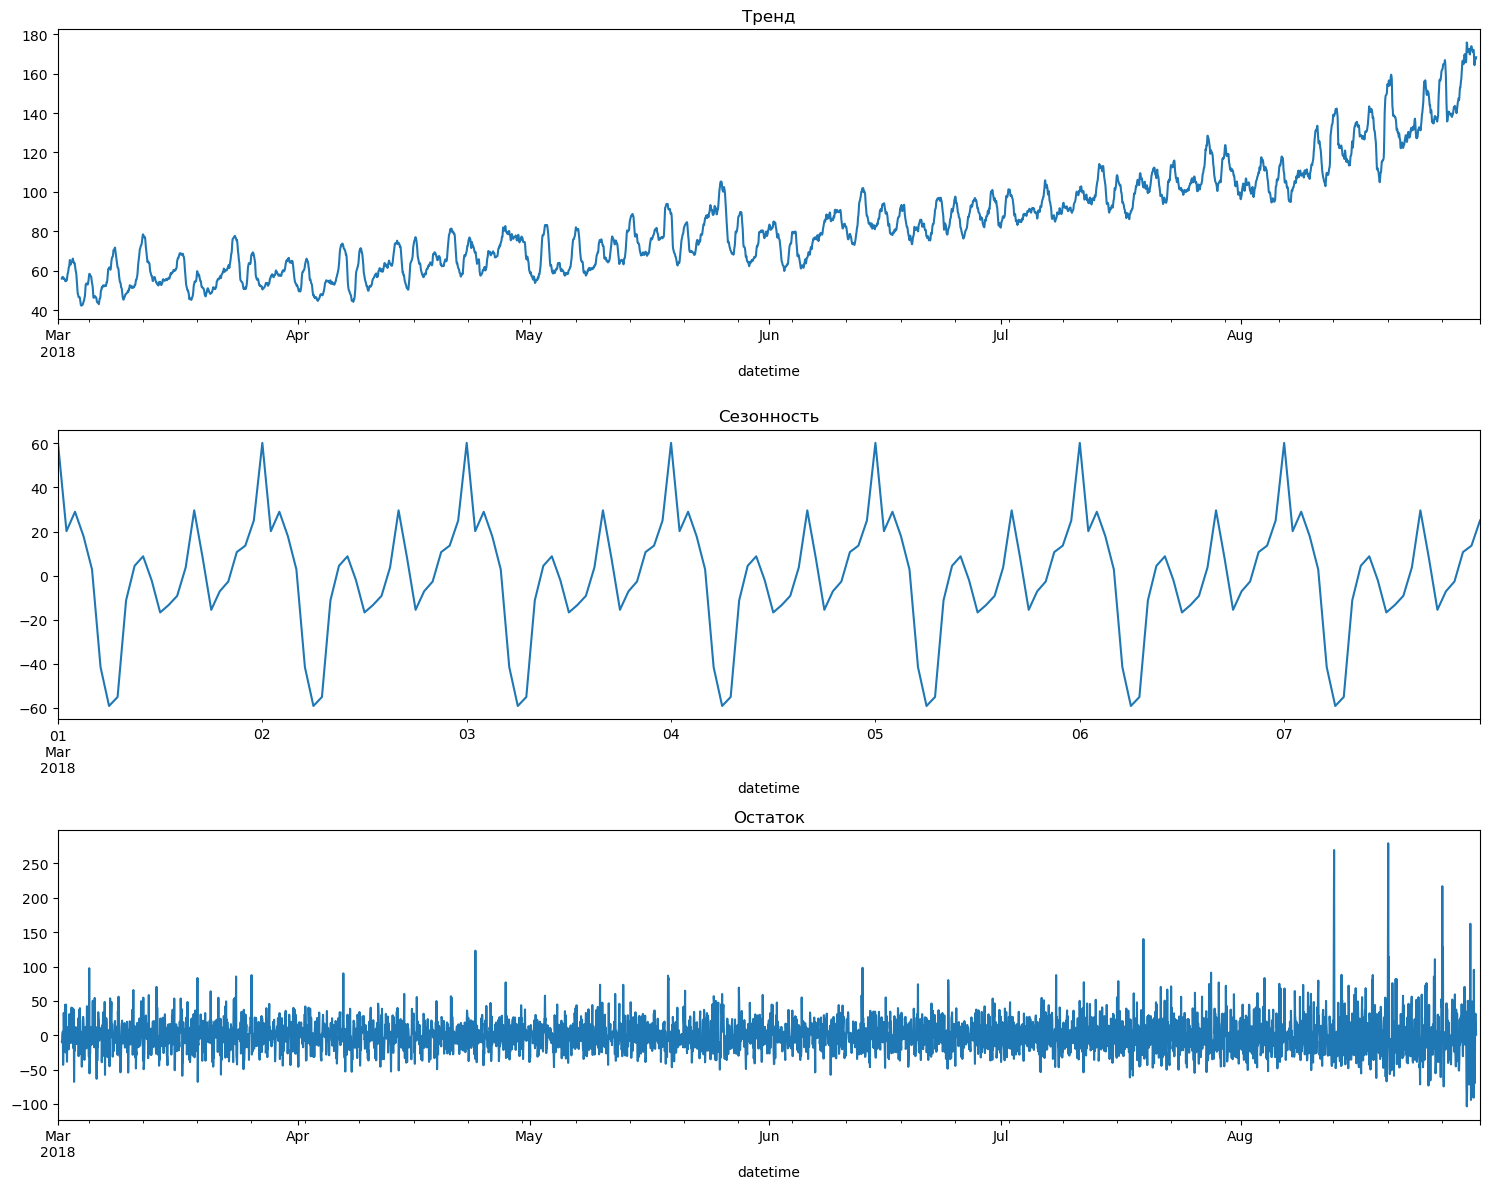

In [6]:
# Разложение временного ряда
decomposed = seasonal_decompose(df['num_orders'])

# Выберем интервал времени для визуализации сезонности
start_date = '2018-03-01'
end_date = '2018-03-07'

plt.figure(figsize=(15, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')

plt.subplot(312)
decomposed.seasonal[start_date:end_date].plot(ax=plt.gca()) 
plt.title('Сезонность')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Остаток')

plt.tight_layout()

<div class="alert alert-block alert-success">
<b>Успех:</b> Декомпозиция была сделана верно. 
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Однако, желательно чтобы сезонность была визуализирована на более коротком интервале!
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Выбрала интервал времени в одну неделю для графика сезонности. Это позволило лучше увидеть повторяющиеся паттерны, которые не были заметны ранее.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

График `Тренд` отражает долгосрочные изменения в данных.  Положительный тренд на графике указывает на то, что среднее значение количества заказов такси в час растет с течением времени. Значит можно говорить о том, что спрос на такси в аэропортах увеличивается на протяжении всего изучаемого периода. Однако нельзя определить по графику, является ли это сезонным явлением, так как в нашем распоряжении только данные за 5 месяцев года.

На графике `Сезонность` заметны повторяющие изо дня в день паттерны, свидетельствующие о том, что поведение заказов такси имеет явную ежедневную сезонность.

Посмотрим как  меняется количество заказов в течение дня и недели.

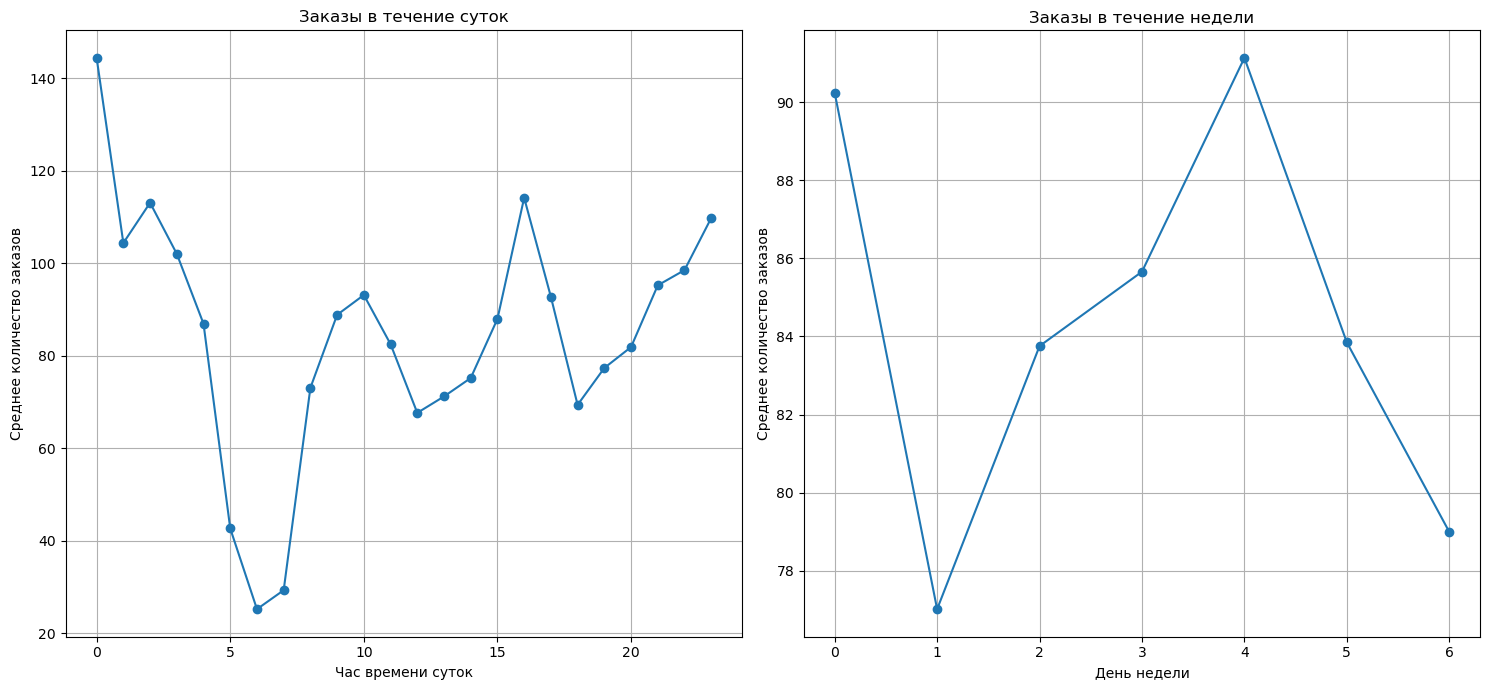

In [7]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek

# Среднее количество заказов по часам
orders_by_hour = df.groupby('hour')['num_orders'].mean()

# Среднее количество заказов по дням недели
orders_by_day_of_week = df.groupby('day_of_week')['num_orders'].mean()

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(orders_by_hour.index, orders_by_hour, marker='o')
axs[0].set_title('Заказы в течение суток')
axs[0].set_xlabel('Час времени суток')
axs[0].set_ylabel('Среднее количество заказов')
axs[0].grid(True)

axs[1].plot(orders_by_day_of_week.index, orders_by_day_of_week, marker='o')
axs[1].set_title('Заказы в течение недели')
axs[1].set_xlabel('День недели')
axs[1].set_ylabel('Среднее количество заказов')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Из графиков мы можем сделать вывод о том, что пики заказов такси в аэропорт приходятся на пятницу и понедельник - дни, когда обычно люди улетают или возвращаются из отпуска. Меньше всего такси вызывают в ранние утренние часы, так как данное время неудобно для вылетов, особенно семьям с детьми, заметны пики в районе 12 часов ночи, 10 утра и 16 часов дня.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   rolling_mean  4393 non-null   float64
 2   hour          4416 non-null   int64  
 3   day_of_week   4416 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 172.5 KB


## Обучение

Создадим дополнительные признаки для датасета: признаки для сдвигов и месяц. Мы создаем 24 сдвига, потому что хотим использовать информацию о заказах такси за предыдущие 24 часа для прогнозирования количества заказов на следующий час. Например, количество заказов в 8 утра одного дня может быть связано с количеством заказов в 8 утра предыдущего дня. Кроме того, нужно будет обработать возникшие из-за этого пропущенные значения.

In [9]:
def create_features(data, max_lag):
    data_copy = data.copy()
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data_copy['num_orders'].shift(lag)

    data['month'] = data_copy.index.month
    
    return data_copy

df_copy = create_features(df, 24)
df_copy.dropna(inplace=True)

Разделим данные на обучающую и тестовую выборки при помощи функции `train_test_split`. Установим параметр `shuffle=False`, чтобы сохранить временной порядок данных.

<div class="alert alert-block alert-info">

<b>Совет: </b> Желательно было написать функцию для создания признаков и сделать это таким образом, чтобы она возвращала новый датафрейм, а не изменяла глобальную переменную.
1. Это хорошая практика (не изменять глобальные переменные внутри функции), которая улучшает читаемость кода.
2. В какой-то момент может появиться необходимость подбирать некоторые параметры используемый внутри функции. В этот момент копирование датасета станет обязательным.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Написала функцию, которая добавляет новые признаки, и сохраняет результат в копии фрейма данных `df_copy`.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

In [10]:
X = df_copy.drop(columns=['num_orders'])
y = df_copy['num_orders']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

Проверим размеры обучающей и тестовой выборок.

In [11]:
print('Размер обучающей выборки:', X_train.shape, y_train.shape)
print('Размер тестовой выборки:', X_test.shape, y_test.shape)

Размер обучающей выборки: (3953, 3) (3953,)
Размер тестовой выборки: (440, 3) (440,)


Используем функцию для подбора гиперпараметров для любой модели. Функция будет принимать модель, параметры для поиска и обучающие данные в качестве аргументов.

<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано корректно.
</div>

In [12]:
results = []

def tune_model(model, param_distributions, features_train, target_train, n_iter=50, cv=5, random_state=12345):
    # Настройка функции скоринга
    scorer = make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)
    
    # Создаем объект TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=cv)
    
    # Настройка и выполнение поиска
    search = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, scoring=scorer, n_jobs=-1, cv=tscv, random_state=random_state)
    search.fit(features_train, target_train)

    # Вывод результатов
    print("Лучшие параметры: ", search.best_params_)
    print("Лучшее RMSE: ", -search.best_score_)
    
     # Добавляем результаты в список
    results.append({
        'model': model.__class__.__name__,
        'best_params': search.best_params_,
        'best_rmse': -search.best_score_
    })


<div class="alert alert-block alert-danger">
<b>Ошибка:</b> При работе с временными рядами нельзя использовать стандартную кросс-валидацию, так как в определенный момент тренировочная выборка окажется позже валидационной. Подробнее можно прочитать <a href ="https://towardsdatascience.com/4-things-to-do-when-applying-cross-validation-with-time-series-c6a5674ebf3a">тут</a>. Для решения этой проблемы стоит использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправила, добавила объект TimeSeriesSplit в параметр cv.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Верно, молодец!
</div>

**DecisionTreeRegressor**

In [13]:
param_distributions_dt = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

model_dt = DecisionTreeRegressor(random_state=12345)
tune_model(model_dt, param_distributions_dt, X_train, y_train)

c:\Users\olean\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры:  {'min_samples_leaf': 8, 'max_depth': 15}
Лучшее RMSE:  25.67574670237351


**RandomForestRegressor**

In [14]:
param_distributions_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_leaf': [1, 2, 4, 8]
}

model_rf = RandomForestRegressor(random_state=12345)
tune_model(model_rf, param_distributions_rf, X_train, y_train)

Лучшие параметры:  {'n_estimators': 200, 'min_samples_leaf': 4, 'max_depth': 50}
Лучшее RMSE:  24.238244390351376


**LGBMRegressor**

In [15]:
param_distributions_lgbm = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_depth': [10, 20, 30, 50, -1],
    'num_leaves': [20, 30, 40, 50, 60, 70]
}

model_lgbm = LGBMRegressor(random_state=12345)
tune_model(model_lgbm, param_distributions_lgbm, X_train, y_train)

Лучшие параметры:  {'num_leaves': 40, 'n_estimators': 100, 'max_depth': 10}
Лучшее RMSE:  23.824509306694758


**CatBoostRegressor**

In [16]:
param_distributions_cb = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.1, 0.2]
}

model_cb = CatBoostRegressor(random_state=12345, verbose=0)  # verbose=0 для отключения вывода промежуточного обучения
tune_model(model_cb, param_distributions_cb, X_train, y_train)

c:\Users\olean\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры:  {'learning_rate': 0.1, 'depth': 4}
Лучшее RMSE:  25.20712285057518


Сравним получившиеся модели и определим лучшую на основе метрики RMSE.

In [17]:
results_df = pd.DataFrame(results)
results_df

,model,best_params,best_rmse
0,DecisionTreeRegressor,"{'min_samples_leaf': 8, 'max_depth': 15}",25.675747
1,RandomForestRegressor,"{'n_estimators': 200, 'min_samples_leaf': 4, '...",24.238244
2,LGBMRegressor,"{'num_leaves': 40, 'n_estimators': 100, 'max_d...",23.824509
3,CatBoostRegressor,"{'learning_rate': 0.1, 'depth': 4}",25.207123


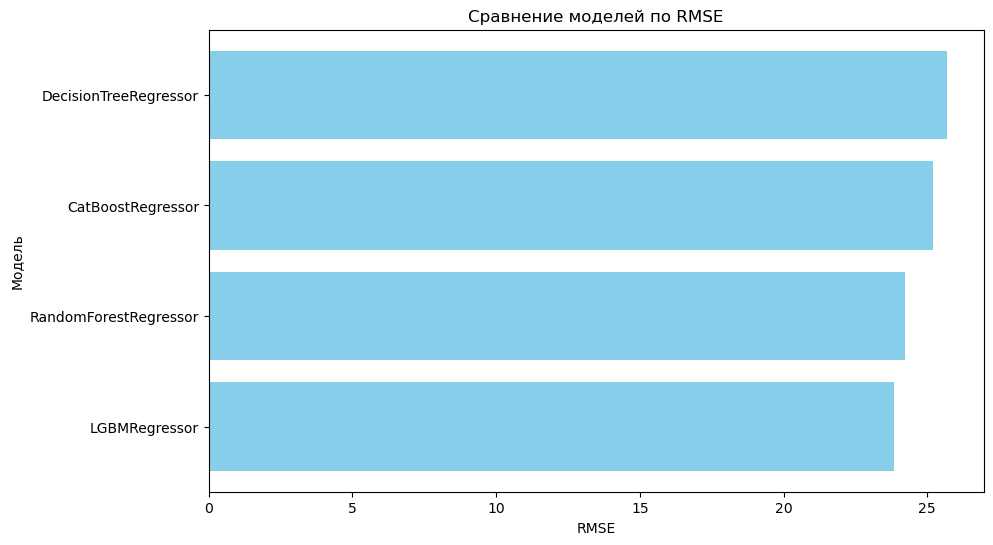

In [18]:
results_df = results_df.sort_values('best_rmse')

plt.figure(figsize=(10, 6))
plt.barh(results_df['model'], results_df['best_rmse'], color='skyblue')

plt.title('Сравнение моделей по RMSE')
plt.xlabel('RMSE')
plt.ylabel('Модель')
plt.show()

В ходе исследования мы провели сравнение нескольких моделей машинного обучения: `DecisionTreeRegressor`, `RandomForestRegressor`, `LGBMRegressor` и `CatBoostRegressor`. Был выполнен подбор гиперпараметров для каждой из этих моделей с использованием метода RandomizedSearchCV.

В результате были найдены оптимальные гиперпараметры для каждой из моделей, которые минимизируют значение метрики RMSE. Лучший результат показала модель **LGBMRegressor** с параметрами 'num_leaves': 40, 'n_estimators': 100 и 'max_depth': 10. Её RMSE на кросс-валидации составил 23.82.

<div class="alert alert-block alert-success">
<b>Успех:</b> Молодец, что попробовал разные модели в этом шаге!
</div>

## Тестирование

Проверим качество нашей лучшей модели на тестовом наборе данных и оценим ее применимость для решения поставленной задачи прогнозирования количества заказов такси на следующий час. Используем модель LGBMRegressor с наилучшими параметрами, полученными в ходе кросс-валидации.

In [21]:
# Создаем и обучаем модель с лучшими параметрами
best_model = LGBMRegressor(num_leaves=40, n_estimators=100, max_depth=10, random_state=12345)
best_model.fit(X_train, y_train)

predictions_test = best_model.predict(X_test)
rmse_test = sqrt(mean_squared_error(y_test, predictions_test))

print("RMSE на тестовой выборке: ", rmse_test)

RMSE на тестовой выборке:  42.15098875296333


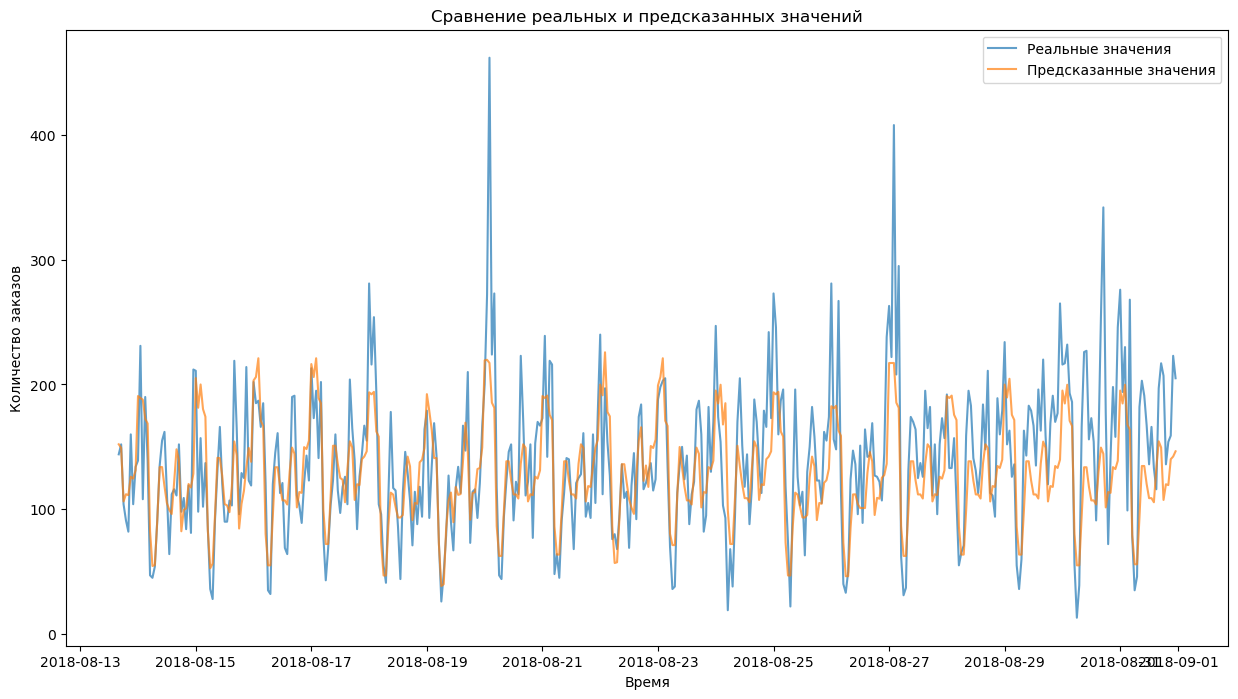

In [22]:
# Создание нового dataframe для удобства визуализации
df_predictions = pd.DataFrame({
    'Real': y_test,
    'Predicted': predictions_test
})

plt.figure(figsize=(15, 8))
plt.plot(df_predictions['Real'], label='Реальные значения', alpha=0.7)
plt.plot(df_predictions['Predicted'], label='Предсказанные значения', alpha=0.7)

plt.legend()
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Время')
plt.ylabel('Количество заказов')
plt.show()

Наша модель LGBMRegressor успешно справилась с задачей прогнозирования количества заказов такси на следующий час. Значение RMSE на тестовой выборке составило 42.15, что удовлетворяет условию проекта (RMSE не более 48).

Это показывает, что наша модель достаточно точно прогнозирует количество заказов такси, и она может быть полезна для планирования работы такси и оптимизации их работы в аэропортах. Для большей точности предстказания следует собрать больше информации в течение как минимум года.

<div class="alert alert-block alert-success">
<b>Успех:</b> Тестирование было сделано корректно. Хорошо, что пресдказания были визуализированы! Приятно видеть вывод в конце проекта!
</div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48